# Final project. Trying to beat the odds

This project uses the data obtained from the Kaggle website, and the "Football events" dataset, which can be found here: https://www.kaggle.com/datasets/secareanualin/football-events </br>

### Part 1: Exploring home advantage

Here, I will briefly explore the data on something soccer pundits and fans, "home advantage". Some of the factors often mentioned by pundits and soccer fans themselves, are the following
1. Late goals (from the support of the home crowd) </br>
2. Penalties (pressure on the ref from the crowds)</br>
3. Home team "pins" back the away team. </br>

Number 3 is often talked about that away teams have to score on the counter-attack. Does away teams score more on the break? 
Stay tuned for the data!

I know there are other factors here. The home team is accustomed to the ground, the locker rooms, less travel, etc. I am not trying to verify causality here, I am simply exploring something common in the conversation. 

### Part 2: Trying to beat the odds using machine learning algorythms. 

There are basically 3 outcomes to a soccer match. 
1. Home win </br>
2. Draw </br>
3. Away win </br>

As these are 3 different categories, I will explore some of the following machine-learning algorithms.
1) Logistic Regression (Lasso) </br>
2) Support Vector Machine </br>
3) K-Nearest Neighbours </br>
4) Decision Tree Classifier </br>
5) Random Forest Classifier </br>


**First, importing the libraries and the data needed for the analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
## Importing the files.
df1 = pd.read_csv('events.csv') 
df2 = pd.read_csv('ginf.csv')

In [3]:
df1.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

***The dataset also has a dictionary attached to it***

In [5]:
encode = pd.read_table('dictionary.txt', delim_whitespace=False, names=('num','events'))

In [6]:
encode ##checking out the dictionary

,num,events
0,event_type,NaN
1,0,Announcement
2,1,Attempt
3,2,Corner
4,3,Foul
...,...,...
70,situation,NaN
71,1,Open play
72,2,Set piece
73,3,Corner


We observe that there are some descriptions of categories in the dictionary. We therefore need to make those categories. 

In [7]:
event_type=encode[1:13]
event_type_2=encode[14:18]
side=encode[19:21]
shot_place=encode[22:35]
shot_outcome=encode[36:40]
location=encode[41:60]
bodypart=encode[61:64]
assist_method=encode[65:70]
situition=encode[71:75]

In [8]:
event_type ## We will now see that the row 0 is no longer the classifier, but a category of the type. No NaN either.

,num,events
1,0,Announcement
2,1,Attempt
3,2,Corner
4,3,Foul
5,4,Yellow card
6,5,Second yellow card
7,6,Red card
8,7,Substitution
9,8,Free kick won
10,9,Offside


So we have cleaned the dictionary. I want to look further on beating the odds, so I want to understand a few more categories in the dataset, before I move forward. Lets look at some aspects for "home advantage" before we try to predict if we can beat the odds.

# Part 1. Exploring the home advantage

## Subquestion 1: Does the home side score more late goals ?

In [9]:
goal=df1[df1["is_goal"]==1]

Text(0.5, 1.0, 'Number of goals during a match')

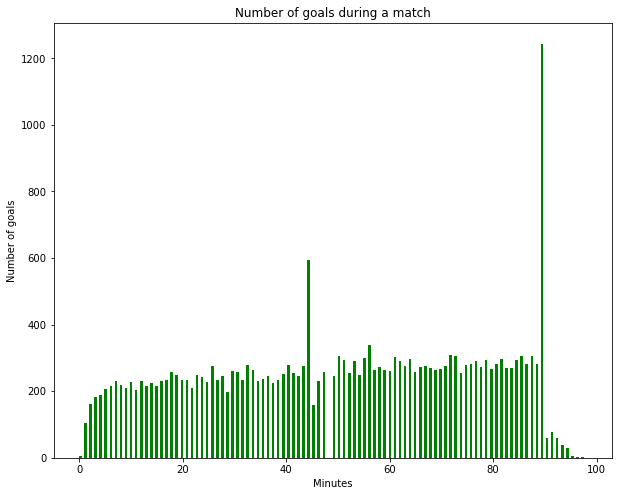

In [10]:
fig=plt.figure(figsize=(10,8))
plt.hist(goal.time,width=.5,bins=100,color="green") 
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.title("Number of goals during a match")

We see that there are quite a few goals evenly across the game, but a high proportion at the end of both halves. 

Text(0.5, 1.0, 'Home and away goals during a match')

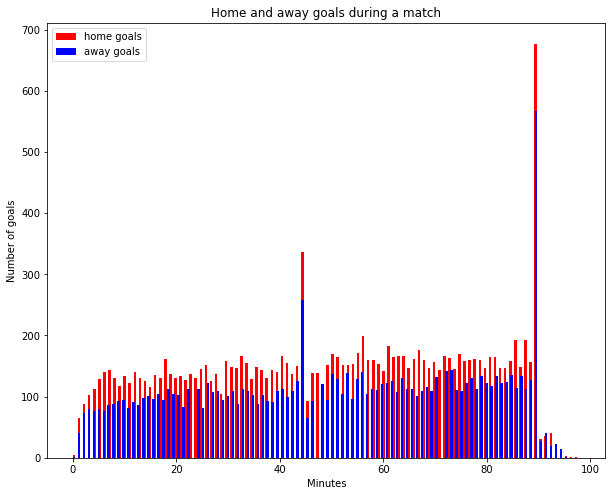

In [11]:
fig=plt.figure(figsize=(10,8))
plt.hist(goal[goal["side"]==1]["time"],width=0.5,bins=100,color="red",label="home goals")   
plt.hist(goal[goal["side"]==2]["time"],width=0.5,bins=100,color="blue",label="away goals") 
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.legend()
plt.title("Home and away goals during a match")

The plot above shows:
-  For every minute, most of the goals scored are by the **home side** , but the away side also seems to have a peak at the end here

This supports the general notion that the home side has a an advantage, but proportionally maybe not as strong in the late minutes of the game as the pundits and fans seems to think. 

The **risk factor** at the end of the game may be the driving force here, meaning teams sometimes gets more desperate for a result

## Subquestion 2: Does the home side gets more penalties ?

In [12]:
penalty_won=df1[df1["event_type"]==11] ## Meaning you have won a penalty. (ref: metadata)
penalty_won.shape 

(2706, 22)

Text(0.5, 1.0, 'Penalties during a match')

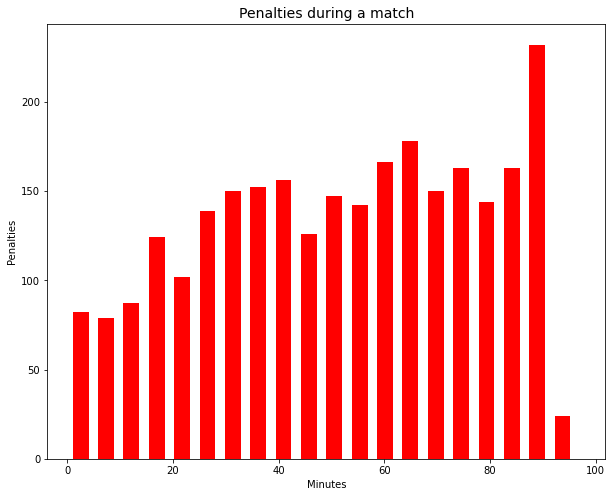

In [13]:
## When do they happen? 
plt.figure(figsize=(10,8))
plt.hist(penalty_won.time,width=3,bins=20,color="red")   
plt.xlabel("Minutes")
plt.ylabel("Penalties")
plt.title("Penalties during a match",fontsize=14)


We can observe that there is not a clear pattern here, but there seems to be quite a few penalties in the late minutes of the game

,home,away
Penalties won,1589,1117


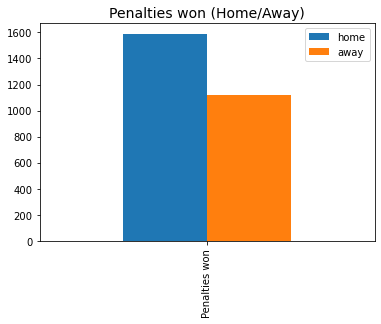

In [14]:
## NOTE! There may be some interpreation issues here, but according to the metadata
## the "penalties conceeded" and "own goal" are listed for the team that benefits
pen_home=penalty_won[penalty_won["side"]==1].shape[0]
pen_away=penalty_won[penalty_won["side"]==2].shape[0]

pen_comb=pd.DataFrame({"home":pen_home,"away":pen_away},index=["Penalties won"])
pen_comb.plot(kind="bar")
plt.title("Penalties won (Home/Away)",fontsize=14)
pen_comb

The plot above shows:
-  The home side gets the **most penalties** , so this provides me with further motivation to explore when in the game this happends


Text(0.5, 1.0, 'Home and away penalties during a match')

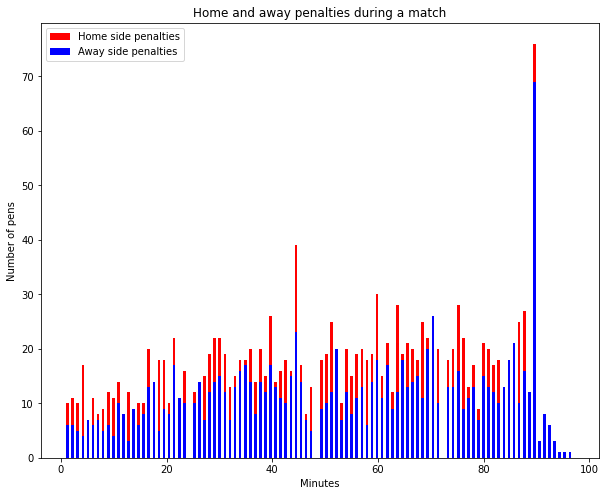

In [15]:
fig=plt.figure(figsize=(10,8))
plt.hist(penalty_won[penalty_won["side"]==1]["time"],width=0.5,bins=100,color="red",label="Home side penalties")   
plt.hist(penalty_won[penalty_won["side"]==2]["time"],width=0.5,bins=100,color="blue",label="Away side penalties") 
plt.xlabel("Minutes")
plt.ylabel("Number of pens")
plt.legend()
plt.title("Home and away penalties during a match")

The plot above shows:
-  The home side gets the **most penalties** , but it is not as a clear advantage at the end of the game as people seem to think


## Subquestion 3: Does the away side score more break away goals ?

For the final bit of exploration, we are going to look at if away teams score more on the counter attack. 
Note: The dataset is very huge so there could have been much more here, and many more fun and exciting analysis, but those tasks should be for further research and exploration.

First, I would like to see how the goals where assisted, as this could provide some further information for the analysis to come. In order to try and keep the reader engaged troughout the notebook, I will go directly into looking at the differences between the home and the away side.

In [16]:
home_assist = goal[goal["side"] == 1]
away_assist = goal[goal["side"] == 2]

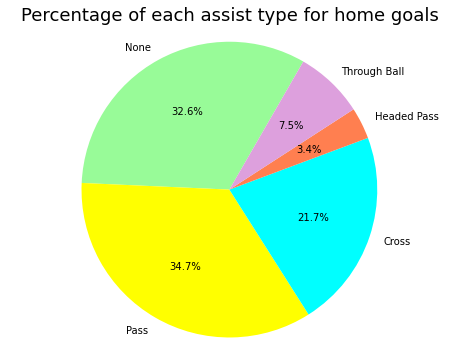

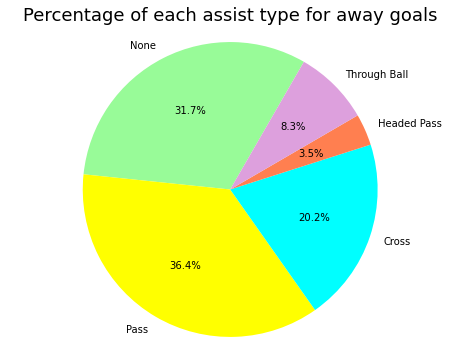

In [17]:
labels=["None","Pass","Cross","Headed Pass","Through Ball"]
sizes=[sum(home_assist["assist_method"]==0),sum(home_assist["assist_method"]==1),sum(home_assist["assist_method"]==2),sum(home_assist["assist_method"]==3),sum(home_assist["assist_method"]==4)]
colors=["palegreen","yellow","aqua","coral","plum"]
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=60)
plt.axis('equal')
plt.title("Percentage of each assist type for home goals",fontsize=18)
fig=plt.gcf() 
fig.set_size_inches(8,6)
plt.show()

labels=["None","Pass","Cross","Headed Pass","Through Ball"]
sizes=[sum(away_assist["assist_method"]==0),sum(away_assist["assist_method"]==1),sum(away_assist["assist_method"]==2),sum(away_assist["assist_method"]==3),sum(away_assist["assist_method"]==4)]
colors=["palegreen","yellow","aqua","coral","plum"]
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=60)
plt.axis('equal')
plt.title("Percentage of each assist type for away goals",fontsize=18)
fig=plt.gcf() 
fig.set_size_inches(8,6)

There doesnt seem to a huge differences from what types of assists there are. We would think that a **through ball** would be indicative of a counter-attack, but as we know, a through ball can be a very short and carefully weighted pass also. 

The **none** category can be interpreted as direct free kicks, penalties, from oppostition player, etc.

### Using the **fast break** metric

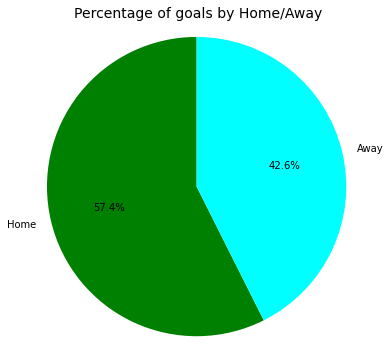

In [18]:
## First, exploring the away and the home goals
labels=["Home","Away"]
sizes=[goal[goal["side"]==1].shape[0],goal[goal["side"]==2].shape[0]]
colors=["green","aqua"]
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title("Percentage of goals by Home/Away", fontsize=14)
fig=plt.gcf() 
fig.set_size_inches(6,6)

In [19]:
counter = goal[goal["fast_break"] == 1]

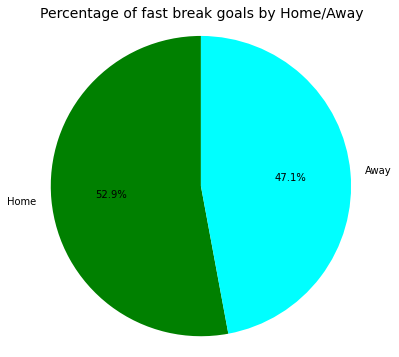

In [20]:
labels=["Home","Away"]
sizes=[counter[counter["side"]==1].shape[0],counter[counter["side"]==2].shape[0]]
colors=["green","aqua"]
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title("Percentage of fast break goals by Home/Away", fontsize=14)
fig=plt.gcf() 
fig.set_size_inches(6,6)

The idea that away sides score more goals on the counter than home sides is not true.

However, we do see that away sides score **47.1 per cent of all fast-break goals**, and only *42.6 per cent of all goals scored*. 

## Analysing the Game information 


Getting to know the dataset containing the odds, imported at the start

In [21]:
df2.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10112 entries, 0 to 10111
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_odsp    10112 non-null  object 
 1   link_odsp  10112 non-null  object 
 2   adv_stats  10112 non-null  bool   
 3   date       10112 non-null  object 
 4   league     10112 non-null  object 
 5   season     10112 non-null  int64  
 6   country    10112 non-null  object 
 7   ht         10112 non-null  object 
 8   at         10112 non-null  object 
 9   fthg       10112 non-null  int64  
 10  ftag       10112 non-null  int64  
 11  odd_h      10112 non-null  float64
 12  odd_d      10112 non-null  float64
 13  odd_a      10112 non-null  float64
 14  odd_over   977 non-null    float64
 15  odd_under  977 non-null    float64
 16  odd_bts    977 non-null    float64
 17  odd_bts_n  977 non-null    float64
dtypes: bool(1), float64(7), int64(3), object(7)
memory usage: 1.3+ MB


# Part 2: Trying to beat the odds

Odds are the probability of what may occur as determined by the bookmaker or bookie. Let's say the odds for the home side to beat the away side are 2/1. </br>

If you place a match winner bet on the home side, you will win your original stake back plus an additional 2 dollars if you staked 1 dollar.

The following function would return the bookmakers' predicted result of a match based on the highest odds for each result for a particular match.

In [23]:
## Defining what types of outcomes the odds finds most likely. 
def odds_predictor(odd_h,odd_d,odd_a):
    if odd_h<odd_d and odd_h<odd_a:
        return("Home Win")
    elif odd_d<odd_h and odd_d<odd_a:
        return("Draw")
    elif odd_a<odd_d and odd_a<odd_h:
        return("Away Win")

The next function would return the actual result of at the end of the match.

In [24]:
def end_result(fthg,ftag):
    if fthg>ftag:
        return("Home Win")
    elif fthg==ftag:
        return("Draw")
    elif fthg<ftag:
        return("Away Win")
    
def end_result_encode(fthg,ftag):
    if fthg>ftag:
        return (1)
    elif fthg==ftag:
        return (2)
    elif fthg<ftag:
        return (3)

We now compare the chances of us predicting the result of the game correctly just by looking at the odds.

In [25]:
def check_odds_predictor(data):
    hit=0
    miss=0
    for i in range(1,data.shape[0]+1):
        odd_h=data[i-1:i]["odd_h"].item()
        odd_d=data[i-1:i]["odd_d"].item()
        odd_a=data[i-1:i]["odd_a"].item()
        fthg=data[i-1:i]["fthg"].item()
        ftag=data[i-1:i]["ftag"].item()
        odds=odds_predictor(odd_h,odd_d,odd_a)
        actual=end_result(fthg,ftag)
        if odds==actual:
            hit+=1
        else:
            miss+=1
    return(str("%.2f"%(hit/(hit+miss)))+str("% hit"))

In [26]:
check_odds_predictor(df2)

'0.53% hit'

This shows that if we just guess the result based on looking at the odds, we would be right **53 per cent** of the time. 

Clearly, we want to have a better indicator that would give us a better chance than this if we want to bet on the match.

## Predicting results
We will try to use the odds and the difference among the odds to predict the result of a match.

In [27]:
x_variable=df2.iloc[:,9:14]
x_variable.head()

,fthg,ftag,odd_h,odd_d,odd_a
0,3,1,1.56,4.41,7.42
1,2,2,2.36,3.60,3.40
2,2,0,1.83,4.20,4.80
3,0,1,1.55,4.50,9.40
4,1,0,2.50,3.40,3.45


In [30]:
x_variable=df2.iloc[:,9:14]
result=[]
for i in range(1,df2.shape[0]+1):
    result.append(end_result_encode(df2[i-1:i]["fthg"].item(),df2[i-1:i]["ftag"].item()))
y=pd.DataFrame(result)
x_variable["h-d_diff"]=abs(x_variable["odd_h"]-x_variable["odd_d"])
x_variable["d-a_diff"]=abs(x_variable["odd_d"]-x_variable["odd_a"])
x_variable["h-a_diff"]=abs(x_variable["odd_h"]-x_variable["odd_a"])
x_variable=x_variable.drop(["fthg","ftag"],axis=1)
x_variable.head()

,odd_h,odd_d,odd_a,h-d_diff,d-a_diff,h-a_diff
0,1.56,4.41,7.42,2.85,3.01,5.86
1,2.36,3.60,3.40,1.24,0.20,1.04
2,1.83,4.20,4.80,2.37,0.60,2.97
3,1.55,4.50,9.40,2.95,4.90,7.85
4,2.50,3.40,3.45,0.90,0.05,0.95


### Spliting the data into training and test set

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x_variable,y,test_size=0.2,random_state=0)

Applying 5-fold Cross Validation to ensure I do not overfit the model

In [34]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

We create a function to access the accuracy of our models.

In [35]:
def train_acc_score(model):
    return round(np.mean(cross_val_score(model,x_train,y_train,cv=k_fold,scoring="accuracy")),2)
def acc_score(model):
    return np.mean(cross_val_score(model,x_train,y_train,cv=k_fold,scoring="accuracy"),2)
def test_acc_score(model):
    return round(accuracy_score(y_test, model.predict(x_test)),2)
def train_prec_score(model):
    return round(precision_score(y_train,model.predict(x_train),average='macro'),2)
def test_prec_score(model):
    return round(precision_score(y_test,model.predict(x_test),average='macro'),2)
def train_f1(model):
    return round(f1_score(y_train,model.predict(x_train),average='macro'),2)
def test_f1(model):
    return round(f1_score(y_test,model.predict(x_test),average='macro'),2)


We then create another function to print for us the summary of the predictions for each model, using **the confusion matrix**

In [36]:
def cm_model_train(model_used):
    cm=confusion_matrix(y_train,model_used.predict(x_train))
    col=["Predicted Home Win","Predicted Draw","Predicted Away Win"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Home Win","Predicted Draw","Predicted Away Win"]
    cm.index=["Actual Home Win","Actual Draw","Actual Away Win"]
    return cm.T

Creating a function for observing the importance of the different variables

In [37]:
def importance_of_var(model):
    variable = pd.DataFrame()
    variable['feature'] = x_train.columns
    variable['importance'] = model.feature_importances_
    variable.sort_values(by=['importance'], ascending=True, inplace=True)
    variable.set_index('feature', inplace=True)
    return variable.plot(kind='barh', figsize=(8,8))

# 5 models to predict the score



Using the following methods:
1) Logistic Regression (Lasso) </br>
2) Support Vector Machine </br>
3) K-Nearest Neighbours </br>
4) Decision Tree Classifier </br>
5) Random Forest Classifier </br>

**1) Logistic Regression (Lasso)**

In [38]:
param_grid = dict(C=(0.0001,0.001,0.005,0.01,0.1,0.5,1))
lasso = GridSearchCV(LogisticRegression(penalty="l2"),param_grid=param_grid,scoring="f1_macro")
lasso=LogisticRegression(penalty="l2")
lasso.fit(x_train,y_train)
#print(log_reg1.best_params_)
print("In-sample accuracy: " + str(train_acc_score(lasso)))
print("Test accuracy: " + str(test_acc_score(lasso)))
print ("In-sample Precision Score: " + str(train_prec_score(lasso)))
print ("Test Precision Score: " + str(test_prec_score(lasso)))
print ("In-sample F1 Score: " + str(train_f1(lasso)))
print ("Test F1 Score: " + str(test_f1(lasso)))
cm_model_train(lasso)

In-sample accuracy: 0.53
Test accuracy: 0.55
In-sample Precision Score: 0.35
Test Precision Score: 0.37
In-sample F1 Score: 0.38
Test F1 Score: 0.4


,Actual Home Win,Actual Draw,Actual Away Win
Predicted Home Win,3234,1544,1275
Predicted Draw,4,0,1
Predicted Away Win,486,510,1035


**2) Support Vector**

In [39]:
svc = svm.SVC()
svc.fit(x_train, y_train)
print("In-sample accuracy: " + str(train_acc_score(svc)))
print("Test accuracy: " + str(test_acc_score(svc)))
print ("In-sample Precision Score: " + str(train_prec_score(svc)))
print ("Test Precision Score: " + str(test_prec_score(svc)))
print ("In-sample F1 Score: " + str(train_f1(svc)))
print ("Test F1 Score: " + str(test_f1(svc)))
cm_model_train(svc)

In-sample accuracy: 0.53
Test accuracy: 0.55
In-sample Precision Score: 0.35
Test Precision Score: 0.38
In-sample F1 Score: 0.37
Test F1 Score: 0.4


,Actual Home Win,Actual Draw,Actual Away Win
Predicted Home Win,3352,1660,1406
Predicted Draw,0,0,0
Predicted Away Win,372,394,905


The predicted accuracy is pretty good, 53%, but we do see from the confusion matrix this according to this, we would never bet a draw. This also seems very to favor home wins.

**3) K-Nearest Neighbours**

In [40]:
KNN=KNeighborsClassifier(n_neighbors=16,p=1,weights='uniform')
KNN.fit(x_train,y_train)
print("In-sample accuracy: " + str(train_acc_score(KNN)))
print("Test accuracy: " + str(test_acc_score(KNN)))
print ("In-sample Precision Score: " + str(train_prec_score(KNN)))
print ("Test Precision Score: " + str(test_prec_score(KNN)))
print ("In-sample F1 Score: " + str(train_f1(KNN)))
print ("Test F1 Score: " + str(test_f1(KNN)))
cm_model_train(KNN)

In-sample accuracy: 0.5
Test accuracy: 0.52
In-sample Precision Score: 0.53
Test Precision Score: 0.47
In-sample F1 Score: 0.5
Test F1 Score: 0.45


,Actual Home Win,Actual Draw,Actual Away Win
Predicted Home Win,3004,1158,951
Predicted Draw,298,458,262
Predicted Away Win,422,438,1098


**4) Decision Tree Classifier**

In [41]:
Dec_tree=DecisionTreeClassifier()
Dec_tree.fit(x_train,y_train)
#print(Dec_tree.best_params_)
print("In-sample accuracy: " + str(train_acc_score(Dec_tree)))
print("Test accuracy: " + str(test_acc_score(Dec_tree)))
print ("In-sample Precision Score: " + str(train_prec_score(Dec_tree)))
print ("Test Precision Score: " + str(test_prec_score(Dec_tree)))
print ("In-sample F1 Score: " + str(train_f1(Dec_tree)))
print ("Test F1 Score: " + str(test_f1(Dec_tree)))
cm_model_train(Dec_tree)

In-sample accuracy: 0.43
Test accuracy: 0.44
In-sample Precision Score: 0.98
Test Precision Score: 0.42
In-sample F1 Score: 0.97
Test F1 Score: 0.42


,Actual Home Win,Actual Draw,Actual Away Win
Predicted Home Win,3722,89,63
Predicted Draw,2,1965,49
Predicted Away Win,0,0,2199


Note the very high "in sample precision score" of **97 per cent**. However, this is not reliable, as we see that there is very low accuracy of 43 per cent. Applying cross-valdiation have here helped us. </br>

We will therefore try to adjust the Tree somewhat, to make sure it does not overfit the model

In [42]:
Dec_tree_adj=DecisionTreeClassifier(max_depth= 8, max_leaf_nodes= 40, min_samples_leaf= 1, min_samples_split= 7)
Dec_tree_adj.fit(x_train,y_train)
#print(Dec_tree.best_params_)
print("In-sample accuracy: " + str(train_acc_score(Dec_tree_adj)))
print("Test accuracy: " + str(test_acc_score(Dec_tree_adj)))
print ("In-sample Precision Score: " + str(train_prec_score(Dec_tree_adj)))
print ("Test Precision Score: " + str(test_prec_score(Dec_tree_adj)))
print ("In-sample F1 Score: " + str(train_f1(Dec_tree_adj)))
print ("Test F1 Score: " + str(test_f1(Dec_tree_adj)))
cm_model_train(Dec_tree_adj)

In-sample accuracy: 0.52
Test accuracy: 0.54
In-sample Precision Score: 0.53
Test Precision Score: 0.46
In-sample F1 Score: 0.42
Test F1 Score: 0.42


,Actual Home Win,Actual Draw,Actual Away Win
Predicted Home Win,3082,1319,1043
Predicted Draw,34,87,44
Predicted Away Win,608,648,1224


We see that we have improved the in sample accuracy from 43 to 52 per cent!

**5) Random Forest Classifier**

In [43]:
ranfor = RandomForestClassifier()
ranfor.fit(x_train,y_train)
print("In-sample accuracy: " + str(train_acc_score(ranfor)))
print("Test accuracy: " + str(test_acc_score(ranfor)))
print ("In-sample Precision Score: " + str(train_prec_score(ranfor)))
print ("Test Precision Score: " + str(test_prec_score(ranfor)))
print ("In-sample F1 Score: " + str(train_f1(ranfor)))
print ("Test F1 Score: " + str(test_f1(ranfor)))
cm_model_train(ranfor)

In-sample accuracy: 0.46
Test accuracy: 0.49
In-sample Precision Score: 0.98
Test Precision Score: 0.44
In-sample F1 Score: 0.97
Test F1 Score: 0.44


,Actual Home Win,Actual Draw,Actual Away Win
Predicted Home Win,3677,63,41
Predicted Draw,27,1967,28
Predicted Away Win,20,24,2242


**Again**, we notice the problem with an overfitting of the model. We therefore adjust the Random Forest Classifier

In [44]:
ranfor_adj = RandomForestClassifier(n_estimators=50,max_depth= 7, max_leaf_nodes=50, min_samples_leaf= 7, min_samples_split= 4,random_state=0)
ranfor_adj.fit(x_train,y_train)
#print(ranfor.best_params_)
print("In-sample accuracy: " + str(train_acc_score(ranfor_adj)))
print("Test accuracy: " + str(test_acc_score(ranfor_adj)))
print ("In-sample Precision Score: " + str(train_prec_score(ranfor_adj)))
print ("Test Precision Score: " + str(test_prec_score(ranfor_adj)))
print ("In-sample F1 Score: " + str(train_f1(ranfor_adj)))
print ("Test F1 Score: " + str(test_f1(ranfor_adj)))
cm_model_train(ranfor_adj)

In-sample accuracy: 0.53
Test accuracy: 0.55
In-sample Precision Score: 0.54
Test Precision Score: 0.48
In-sample F1 Score: 0.44
Test F1 Score: 0.43


,Actual Home Win,Actual Draw,Actual Away Win
Predicted Home Win,3141,1361,1084
Predicted Draw,71,137,55
Predicted Away Win,512,556,1172


We see that we have improved the in sample accuracy from 46 to 53 per cent, which is great, but we see that there are some "false" outcomes in the confusion matrix. 

# Presenting the precision of the results

In [45]:
Classifiers=["Logistic Regression (Lasso)","Support Vector Machine(Linear)","K-Nearest Neighbours","Decision Tree","Random Forest"]
in_sample_acc=[round(train_acc_score(x),2) for x in [lasso,svc,KNN,Dec_tree_adj,ranfor_adj]]
test_acc=[round(test_acc_score(x),2) for x in [lasso,svc,KNN,Dec_tree_adj,ranfor_adj]]
train_prec = [round(train_prec_score(x),2) for x in [lasso,svc,KNN,Dec_tree_adj,ranfor_adj]]
test_prec = [round(test_prec_score(x),2) for x in [lasso,svc,KNN,Dec_tree_adj,ranfor_adj]]
trainf1 = [train_f1(x) for x in [lasso,svc,KNN,Dec_tree_adj,ranfor_adj]]
testf1 = [test_f1(x) for x in [lasso,svc,KNN,Dec_tree_adj,ranfor_adj]]
cols=["Classifier","Training Accuracy","Test Accuracy","Training Precision","Test Precision","Training F1 Score","Test F1 Score"]
pred_results = pd.DataFrame(columns=cols)
pred_results["Classifier"]=Classifiers
pred_results["Training Accuracy"]=in_sample_acc
pred_results["Test Accuracy"]=test_acc
pred_results["Training Precision"]=train_prec
pred_results["Test Precision"]=test_prec
pred_results["Training F1 Score"]=trainf1
pred_results["Test F1 Score"]=testf1
pred_results

,Classifier,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training F1 Score,Test F1 Score
0,Logistic Regression (Lasso),0.53,0.55,0.35,0.37,0.38,0.40
1,Support Vector Machine(Linear),0.53,0.55,0.35,0.38,0.37,0.40
2,K-Nearest Neighbours,0.50,0.52,0.53,0.47,0.50,0.45
3,Decision Tree,0.52,0.54,0.53,0.46,0.42,0.42
4,Random Forest,0.53,0.55,0.54,0.48,0.44,0.43


We can see that these models yield about the same (or even worse) accuracy than by just guessing based on the odds 53% accuracy. So, I would have liked to have better predictions. 

When we look at the factors as a whole, the **Random Forest is the winner**, as it has the highest accuracy, although the K-nearest neighbour had a higher Test set F1 score.

## Evaluation of the variables and their importance

<AxesSubplot:ylabel='feature'>

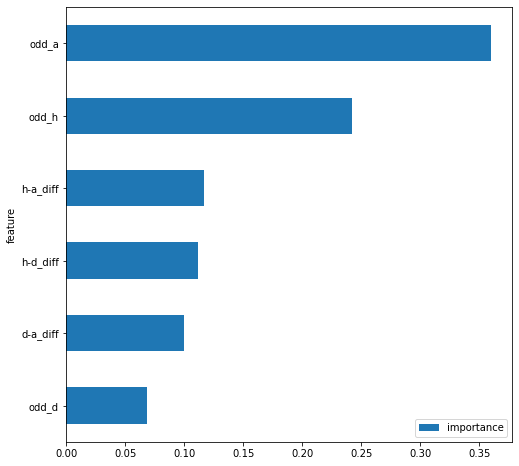

In [46]:
importance_of_var(ranfor_adj)

This plot is a good summary of the analysis. The winning odds are the most important for the random forest classifier, as well as their difference.

This, along with the model that have been selected, shows that in order to actually being able to beat the odds, we need even more information. However, that is outside of the scope of this paper.

Further analysis should use the form of the sides, the styles of the sides, the previous results, the factors of the different leagues, etc. All of these metrix are "baked into" the odds, so it is hard to beat it, without being able to split it completely.